In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_theme(style = "darkgrid")

In [2]:
data = pd.read_csv('Stars.csv')
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [3]:
print(data.shape)

(240, 7)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [5]:
data.describe()

,Temperature,L,R,A_M,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


Text(0.5, 1.0, 'Star Color Analysis')

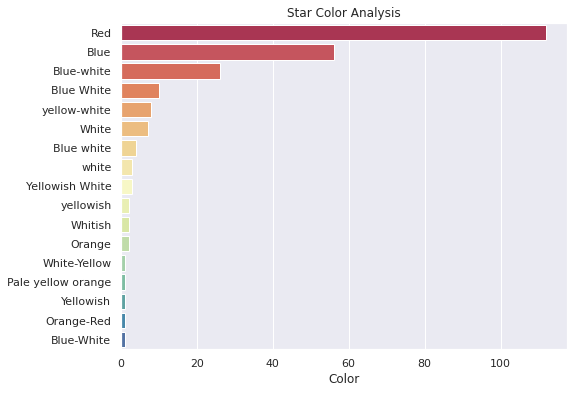

In [6]:
a= pd.DataFrame(data['Color'].value_counts())
plt.figure(figsize=(8,6))
sns.barplot(data= a, x='Color',y= a.index, palette= 'Spectral')
plt.title("Star Color Analysis")

Text(0.5, 1.0, 'Star Spectral Class Analysis')

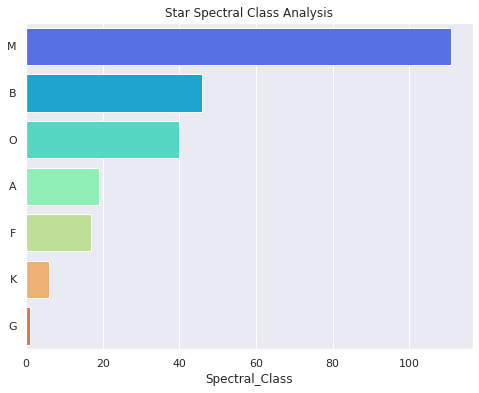

In [7]:
a= pd.DataFrame(data['Spectral_Class'].value_counts())
plt.figure(figsize=(8,6))
sns.barplot(data=a, x='Spectral_Class',y= a.index, palette= 'rainbow')
plt.title("Star Spectral Class Analysis")

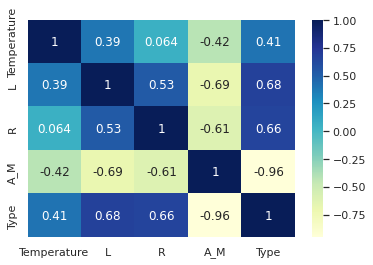

In [8]:
import seaborn as sb
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [9]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Color_Label']= label_encoder.fit_transform(data['Color'])
data['Spectral_Class_Label']= label_encoder.fit_transform(data['Spectral_Class'])

In [10]:
X = data.drop(labels=['Spectral_Class_Label','Color','Spectral_Class'], axis=1).values
y= data["Spectral_Class_Label"].values

#PCA

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

##PCA with 2 Prinicipal Components

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2 = pca.fit_transform(X)

In [13]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.58015798 0.23500814]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=5)

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
print('Accuracy: ' , accuracy_score(y_test, y_pred))

Accuracy:  0.6875


##PCA with 4 Principal Components

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
X4 = pca.fit_transform(X)

In [18]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.58015798 0.23500814 0.06856623 0.0601706 ]


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size=0.2, random_state=5)

In [20]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score
print('Accuracy: ' , accuracy_score(y_test, y_pred))

Accuracy:  0.7708333333333334
